In [17]:
import numpy as np

np.random.seed(1)

true_p = 0.7
data = np.random.binomial(1, true_p, 1000)

print("Observed coin tosses (1=heads, 0=tails):\n", data)
print("Number of heads observed:", data.sum())

Observed coin tosses (1=heads, 0=tails):
 [1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1
 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1

In [18]:
# Now assume coin toss follows a Bernoulli distribution, P(X=1)=p, P(X=0)=1-p
# log likelihood function for Bernoulli distribution
def log_likelihood(p, data):
    return np.sum(data * np.log(p) + (1 - data) * np.log(1 - p))

In [19]:
import matplotlib.pyplot as plt

p_values = np.linspace(0.01, 0.99, 100)
ll_values = [log_likelihood(p, data) for p in p_values]

Text(0.5, 1.0, 'Log Likelihood vs Probability of Heads')

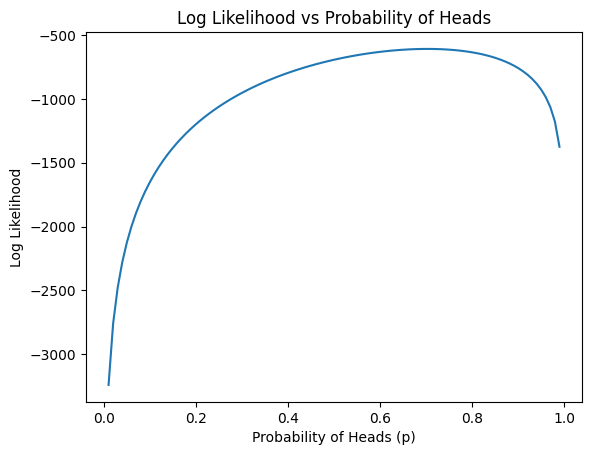

In [20]:
plt.plot(p_values, ll_values)
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs Probability of Heads')

In [22]:
# MLE estimate is the p that maximizes the log likelihood
p_mle = data.mean()
print("MLE estimate of probability of heads:", p_mle)

MLE estimate of probability of heads: 0.703


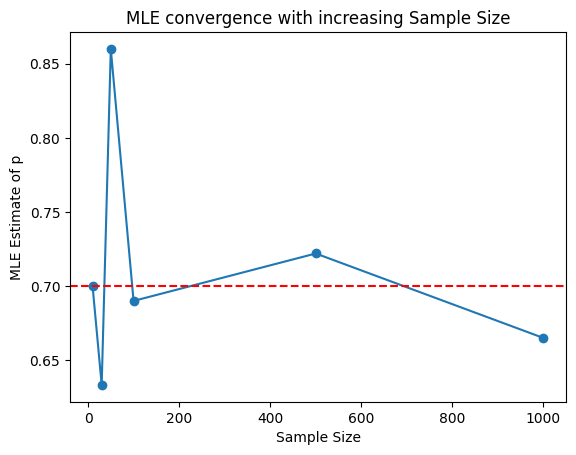

In [23]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

true_p = 0.7
sample_sizes = [10, 30, 50, 100, 500, 1000]
p_mle_values = []

for n in sample_sizes:
    data = np.random.binomial(1, true_p, n)
    p_mle = data.mean()
    p_mle_values.append(p_mle)
    
# Plotting the convergence of MLE estimate
plt.plot(sample_sizes, p_mle_values, marker='o')
plt.axhline(true_p, color='r', linestyle='--', label='True p')
plt.xlabel('Sample Size')
plt.ylabel('MLE Estimate of p')
plt.title('MLE convergence with increasing Sample Size')
plt.show()

## Normal Distribution

In [31]:
# Now consider coin tosses following a Normal distribution
np.random.seed(1)
n = 1000
true_mu = 0.7
true_sigma = 0.1
data = np.random.normal(true_mu, true_sigma, n)
#print("Observed coin tosses (1=heads, 0=tails):\n", data)
print("Number of heads observed:", data.sum())

# Log-likelihood for Normal distribution
def log_likelihood_normal(mu, sigma, data):
    n = len(data)
    return -0.5 * n * np.log(2 * np.pi * sigma**2) - np.sum((data - mu)**2) / (2 * sigma**2)
# MLE estimates for Normal distribution
mu_mle = np.mean(data)
sigma_mle = np.std(data, ddof=0)
print("MLE estimate of mu:", mu_mle)
print("MLE estimate of sigma:", sigma_mle)


Number of heads observed: 703.8812476159601
MLE estimate of mu: 0.70388124761596
MLE estimate of sigma: 0.09810041339322118


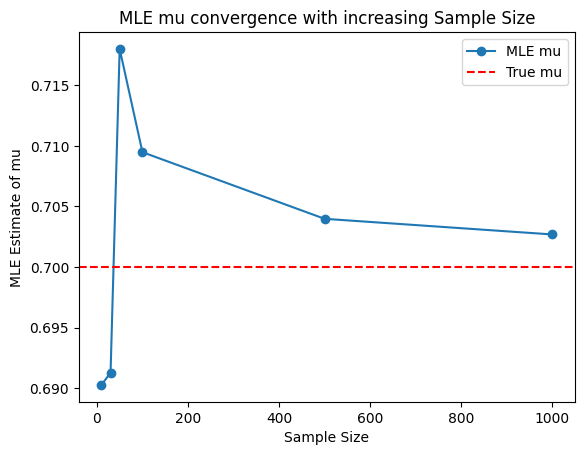

In [28]:
# Now consider coin tosses following a Normal distribution increasing sample size
np.random.seed(1)
n_values = [10, 30, 50, 100, 500, 1000]
mu_mle_values = []
sigma_mle_values = []
for n in n_values:
    data = np.random.normal(true_mu, true_sigma, n)
    mu_mle = np.mean(data)
    sigma_mle = np.std(data, ddof=0)
    mu_mle_values.append(mu_mle)
    sigma_mle_values.append(sigma_mle)
    
# Plotting the convergence of MLE estimates
plt.plot(n_values, mu_mle_values, marker='o', label='MLE mu')
plt.axhline(true_mu, color='r', linestyle='--', label='True mu')
plt.xlabel('Sample Size')
plt.ylabel('MLE Estimate of mu')
plt.title('MLE mu convergence with increasing Sample Size')
plt.legend()
plt.show()

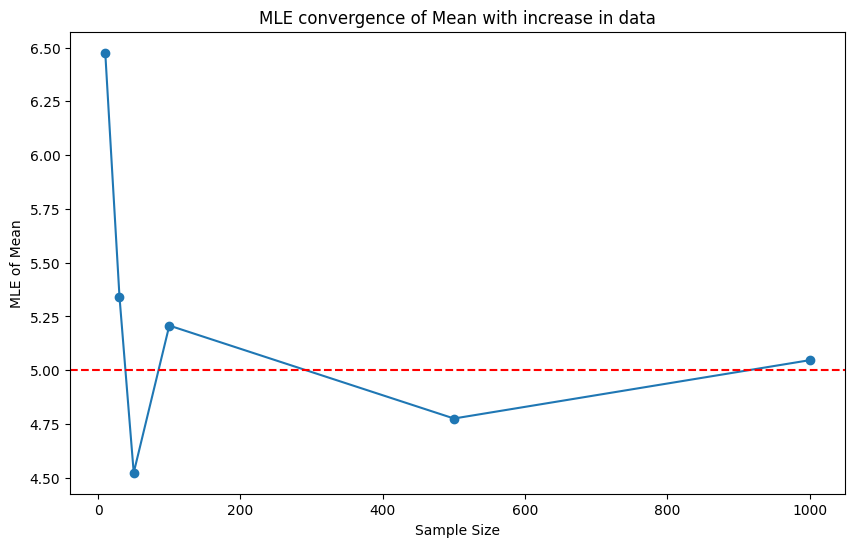

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
 
true_mu = 5.0  # True mean
true_sigma = 2.0  # True standard deviation
sample_sizes = [10, 30, 50, 100, 500, 1000]
mu_estimates = []
 
for n in sample_sizes:
    data = np.random.normal(true_mu, true_sigma, size=n)
   
    # MLE estimation for mean
    mu_mle = data.mean()
    mu_estimates.append(mu_mle)
   
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, mu_estimates, marker='o', label='MLE Estimates')
plt.axhline(y=true_mu, color='r', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('MLE of Mean')
plt.title('MLE convergence of Mean with increase in data')
plt.show()

Observed coin tosses (1=heads, 0=tails):
 [ 8.24869073e+00  3.77648717e+00  3.94365650e+00  2.85406276e+00
  6.73081526e+00  3.96922606e-01  8.48962353e+00  3.47758620e+00
  5.63807819e+00  4.50125925e+00  7.92421587e+00  8.79718581e-01
  4.35516559e+00  4.23189129e+00  7.26753888e+00  2.80021747e+00
  4.65514358e+00  3.24428316e+00  5.08442749e+00  6.16563043e+00
  2.79876165e+00  7.28944742e+00  6.80318144e+00  6.00498868e+00
  6.80171190e+00  3.63254428e+00  4.75421955e+00  3.12846113e+00
  4.46422384e+00  6.06071093e+00  3.61667850e+00  4.20649295e+00
  3.62565460e+00  3.30958872e+00  3.65750774e+00  4.97467080e+00
  2.76537930e+00  5.46883140e+00  8.31960435e+00  6.48408832e+00
  4.61632890e+00  3.22474207e+00  3.50568341e+00  8.38490920e+00
  5.10161551e+00  3.72600871e+00  5.38183097e+00  9.20051027e+00
  5.24031790e+00  6.23440622e+00  5.60034064e+00  4.29550031e+00
  2.71496360e+00  4.30131456e+00  4.58221153e+00  6.17324638e+00
  6.67796683e+00  6.86220416e+00  5.57117465e+00

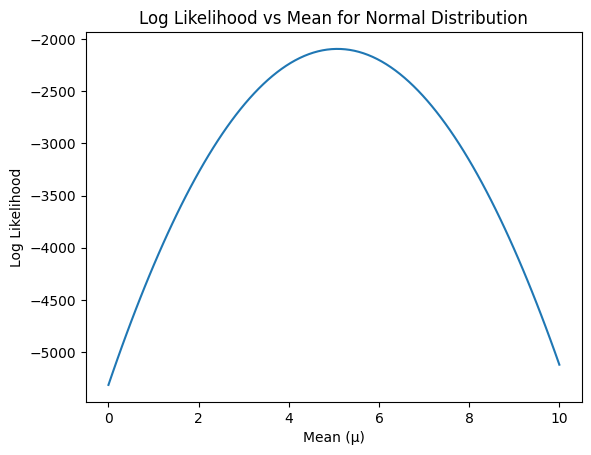

MLE of mean : 5.077624952319204
MLE of standard deviation : 1.9620082678644233


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data from Normal distribution
np.random.seed(1)
true_mu = 5
true_sigma = 2
n = 1000

data = np.random.normal(true_mu, true_sigma, n)

print("Observed coin tosses (1=heads, 0=tails):\n", data)
print("Number of heads observed:", data.sum())

# Log-likelihood for Normal distribution
def log_likelihood_normal(mu, sigma, data):
    n = len(data)
    return -n/2 * np.log(2*np.pi*sigma**2) - np.sum((data - mu)**2) / (2*sigma**2)

# Vary mu and compute log-likelihood
mu_values = np.linspace(0, 10, 100)
ll_values = [log_likelihood_normal(mu, true_sigma, data) for mu in mu_values]

plt.plot(mu_values, ll_values)
plt.xlabel("Mean (μ)")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihood vs Mean for Normal Distribution")
plt.show()

# MLE estimates
mu_mle = np.mean(data)
sigma_mle = np.std(data, ddof=0)

print("MLE of mean :", mu_mle)
print("MLE of standard deviation :", sigma_mle)


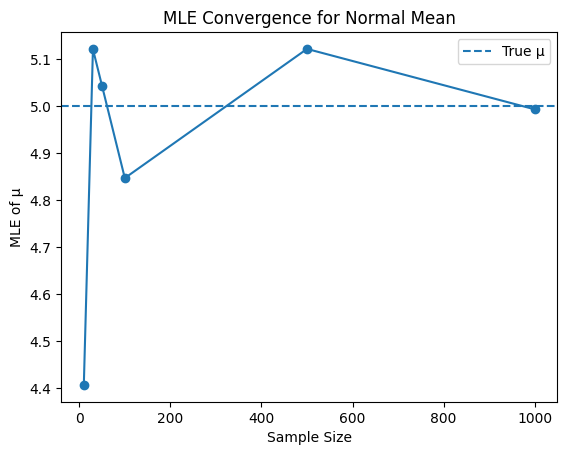

In [33]:
sample_sizes = [10, 30, 50, 100, 500, 1000]
mu_mle_values = []

for n in sample_sizes:
    data = np.random.normal(true_mu, true_sigma, n)
    mu_mle_values.append(np.mean(data))

plt.plot(sample_sizes, mu_mle_values, marker='o')
plt.axhline(true_mu, linestyle='--', label='True μ')
plt.xlabel('Sample Size')
plt.ylabel('MLE of μ')
plt.title('MLE Convergence for Normal Mean')
plt.legend()
plt.show()
